In [69]:
from plotdelice.graphs import violinplot_delice, barplot_delice, multiplot_delice
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("../../")
print(os.getcwd())

/Users/quillan/Documents/Lab/Thesis/Thesis_2024


In [3]:
df = pd.read_csv("Spinal muscle stainings/Data/MP_analysis_with_manual_annotations.csv",index_col=0)
conds = ["Inpp5e",'WT']
genotypes = []
for name in df['Fish_id']:
    for cond in conds:
        if cond in name:
            genotypes.append(cond)
        
df['genotype'] = genotypes
df.to_csv('Results.csv')

In [79]:
df.head()

,somite_index,n_mps,n_mps_manual,Fish_id,image_path,whole_img_path,genotype
0,0,2,4,Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F00,['/Users/quillan/Documents/Lab/Thesis/Chevron ...,/Users/quillan/Documents/Lab/Thesis/Chevron An...,Inpp5e
1,1,4,3,Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F00,['/Users/quillan/Documents/Lab/Thesis/Chevron ...,/Users/quillan/Documents/Lab/Thesis/Chevron An...,Inpp5e
2,2,4,4,Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F00,['/Users/quillan/Documents/Lab/Thesis/Chevron ...,/Users/quillan/Documents/Lab/Thesis/Chevron An...,Inpp5e
3,3,3,2,Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F00,['/Users/quillan/Documents/Lab/Thesis/Chevron ...,/Users/quillan/Documents/Lab/Thesis/Chevron An...,Inpp5e
4,4,3,4,Inpp5e_2dpf_4D9-488_DAPI_2024-04-19_F00,['/Users/quillan/Documents/Lab/Thesis/Chevron ...,/Users/quillan/Documents/Lab/Thesis/Chevron An...,Inpp5e


In [11]:
df_means = {"nmps_mean":[],"genotype":[]}

for name in np.unique(df['Fish_id']):
    df_means["nmps_mean"].append(np.average(df['n_mps_manual'][df['Fish_id'] == name]))
    #df_means["nmps_mean_manual"].append(np.average(df['solidity'][df['Fish_id'] == name]))
    df_means["genotype"].append(np.unique(df['genotype'][df['Fish_id'] == name])[0])
df_means = pd.DataFrame(df_means)
df_means


,nmps_mean,genotype
0,3.500000,Inpp5e
1,4.222222,Inpp5e
2,5.125000,Inpp5e
3,3.700000,Inpp5e
4,4.000000,Inpp5e
5,3.125000,Inpp5e
6,3.900000,Inpp5e
7,3.333333,Inpp5e
8,2.875000,Inpp5e
9,2.666667,Inpp5e


    Inpp5e mean:                             3.644722222222222
        WT mean:                            3.7403061224489798
Normality test p-value for the entire dataset (Shapiro): 0.24003981053829193
Data follows normal distribution: Yes
Inpp5e vs WT | t-test: Not Significant | padj: 0.7994203060148074  p-val: 0.7994203060148074


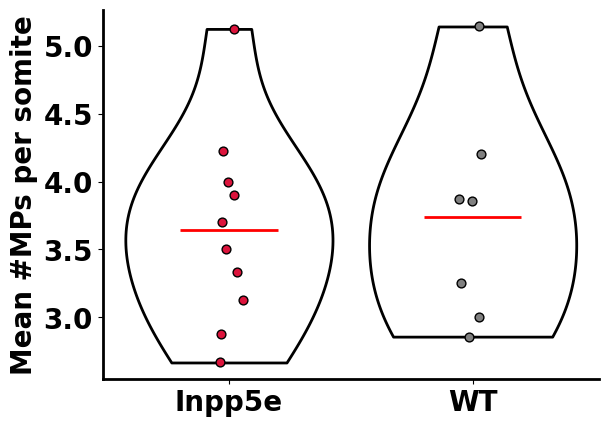

In [58]:
colors=['crimson','grey']
violin,axs = violinplot_delice(df_means,'genotype','nmps_mean',colors=colors, point_size=40,jitter=0.06,title="",y_label="Mean #MPs per somite",xlabel="")
#violin.savefig("F01-004-MPS-per-Somite.pdf", bbox_inches='tight')

0: Inpp5e mean:3.9 x WT mean:3.5714285714285716             padj: 0.4783854023538232    p-val: 0.4783854023538232
1: Inpp5e mean:3.8 x WT mean:4.571428571428571              padj: 0.16572756949926062   p-val: 0.16572756949926062
2: Inpp5e mean:3.8 x WT mean:3.4285714285714284             padj: 0.5166360876930736    p-val: 0.5166360876930736
3: Inpp5e mean:3.5 x WT mean:4.285714285714286              padj: 0.33192850618218084   p-val: 0.33192850618218084
4: Inpp5e mean:3.7 x WT mean:3.5714285714285716             padj: 0.823488597441637     p-val: 0.823488597441637
5: Inpp5e mean:3.8 x WT mean:3.6666666666666665             padj: 0.8549940407303682    p-val: 0.8549940407303682
6: Inpp5e mean:3.6 x WT mean:3.1666666666666665             padj: 0.4858015134798396    p-val: 0.4858015134798396
7: Inpp5e mean:3.5 x WT mean:2.6666666666666665             padj: 0.4204406243586952    p-val: 0.4204406243586952
8: Inpp5e mean:3.5 x WT mean:3.0                            padj: 0.8239678138065049   

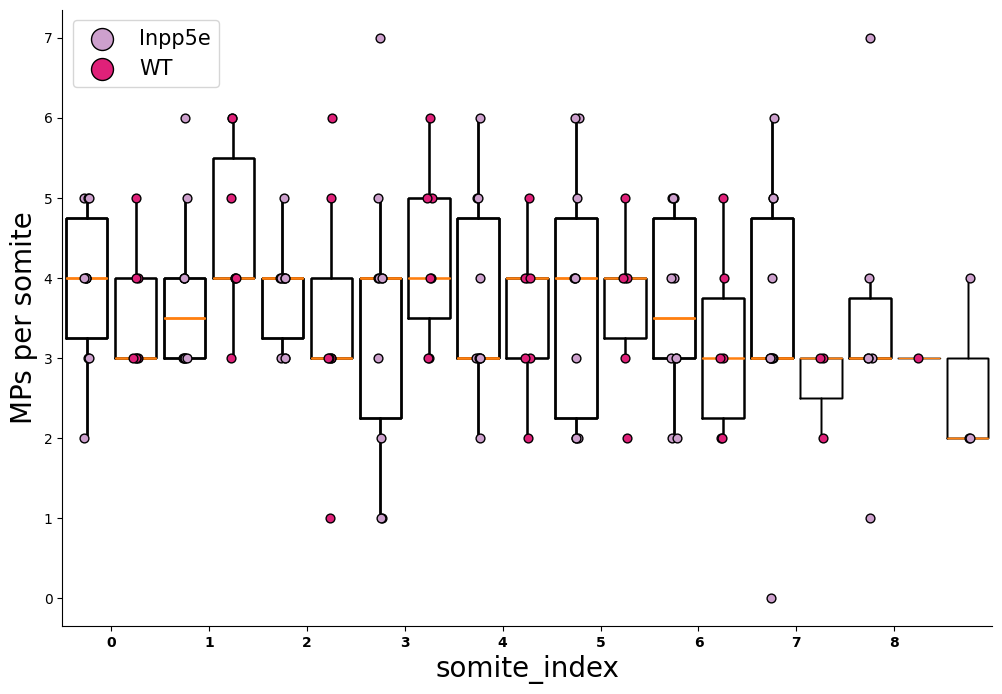

In [77]:

violin,axs = multiplot_delice(df,'genotype','somite_index','n_mps_manual', point_size=40,jitter=0.06,title="",y_label="MPs per somite")

#violin.savefig("F01-004-MPS-per-Somite.pdf", bbox_inches='tight')


Text(0, 0.5, '%')

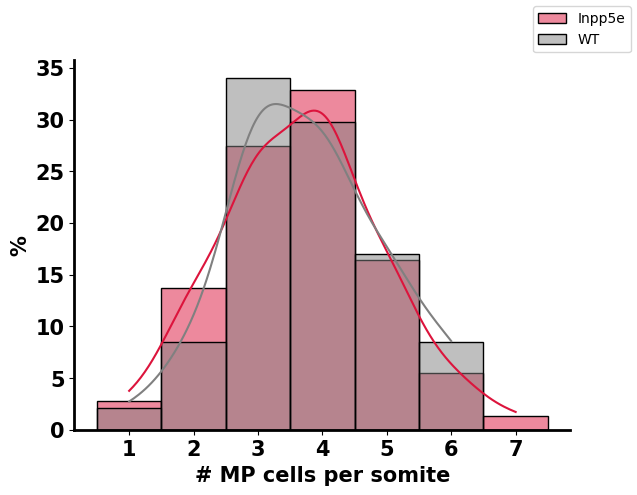

In [112]:

fig,axs=plt.subplots()
sns.histplot(df['n_mps_manual'][(df['genotype']=='Inpp5e') & (df['somite_index']!= 8) & (df['somite_index']!= 7)],stat='percent',bins = 8, color='crimson',kde=True,label='Inpp5e',discrete=True)
sns.histplot(df['n_mps_manual'][(df['genotype']=='WT') & (df['somite_index' ]!= 8)& (df['somite_index']!= 7)],stat='percent',bins = 8, color='grey',kde=True,label="WT",discrete=True)
#sns.histplot(df,x='n_mps_manual',hue='genotype',kde=True, stat='percent',multiple="dodge")
fig.legend()
axs.spines[['right', 'top']].set_visible(False)
axs.spines['bottom'].set_linewidth(2)  
axs.spines['left'].set_linewidth(2) 
fontsize=15

plt.yticks(fontsize=fontsize,weight='bold')
plt.xticks(fontsize=fontsize,weight='bold')  
plt.xlabel("# MP cells per somite",fontsize=fontsize, weight='bold')
plt.ylabel("%",fontsize=fontsize, weight='bold')

In [113]:
from scipy import stats
# Filter data for each genotype and category
inpp5e_counts = df[(df['genotype']=='Inpp5e') & (df['somite_index']!= 8) & (df['somite_index']!= 7)]['n_mps_manual'].value_counts().sort_index()
wt_counts = df[(df['genotype']=='WT') & (df['somite_index' ]!= 8) & (df['somite_index']!= 7)]['n_mps_manual'].value_counts().sort_index()

# Align the series to ensure they have the same index (fill missing categories with 0)
all_categories = sorted(set(inpp5e_counts.index).union(set(wt_counts.index)))
inpp5e_counts = inpp5e_counts.reindex(all_categories, fill_value=0)
wt_counts = wt_counts.reindex(all_categories, fill_value=0)

# Create a contingency table
contingency_table = np.array([inpp5e_counts, wt_counts])

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")


Chi-squared Statistic: 2.253228524531965
P-value: 0.8949987838613862
Degrees of Freedom: 6
Expected Frequencies: 
[[ 1.825       8.51666667 21.9        23.11666667 12.16666667  4.86666667
   0.60833333]
 [ 1.175       5.48333333 14.1        14.88333333  7.83333333  3.13333333
   0.39166667]]
